In [1]:
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
import lib
import array
%matplotlib inline


def export_mp3(audio, data, name):
    data = data * 32767 / np.max(np.abs(data))
    data = data.reshape(-1).real.astype(np.int16)
    export_audio = audio._spawn(array.array(audio.array_type, data))
    export_audio.export(name + ".mp3", format="mp3")


audio = AudioSegment.from_file(
    "Example Music/prologue.mp3", format='mp3')
audio_data = np.array(
    audio.get_array_of_samples(), dtype=np.int16)
if audio.channels == 2:
    audio_data.reshape(2, -1)


In [2]:
print("Adding noise to the signal...")
noised_data = lib.add_noise(audio_data, 0, 200)
print("Denoising the signal...")
denoised_data = lib.SS_denoise(noised_data, 44100, 5, 0.005)

print("Exporting the data...")
export_mp3(audio, noised_data, "noised_audio")
export_mp3(audio, denoised_data, "denoised_audio")


Adding noise to the signal...
Denoising the signal...
Exporting the data...


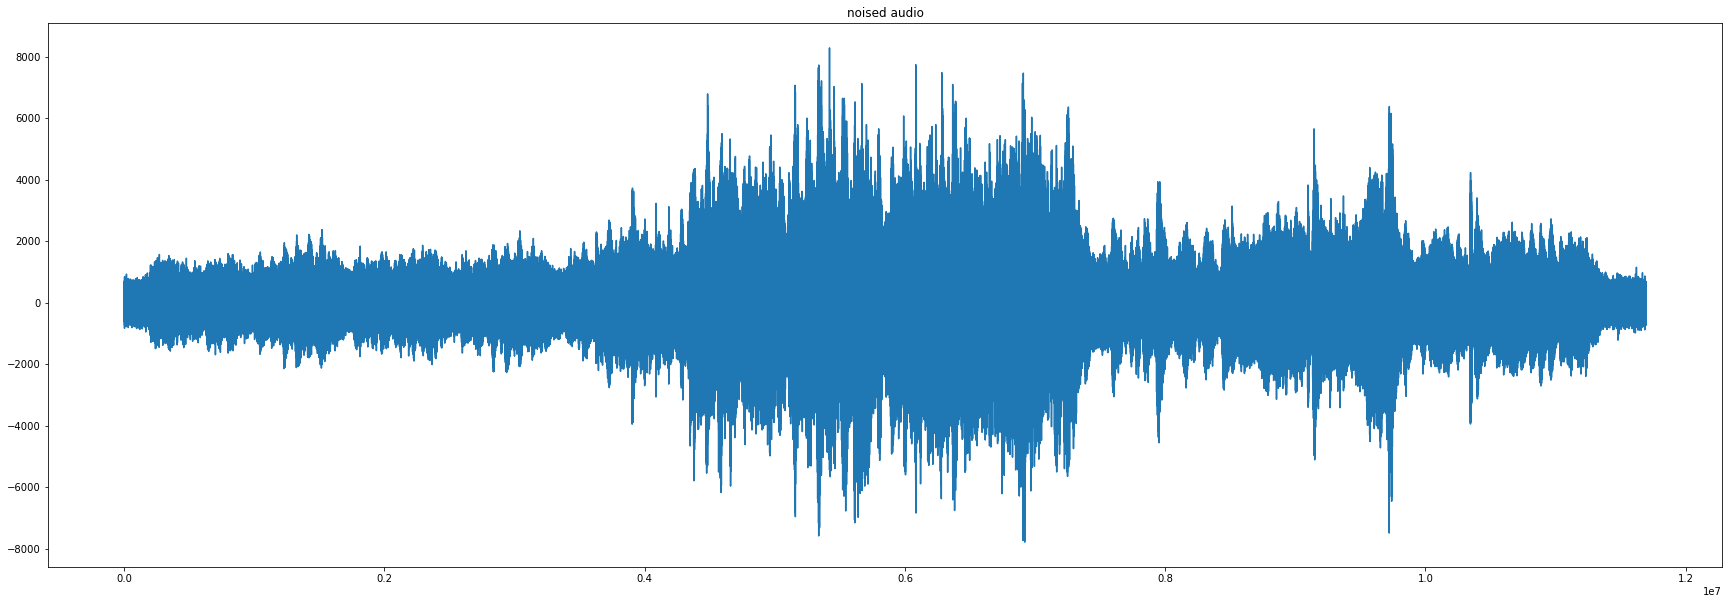

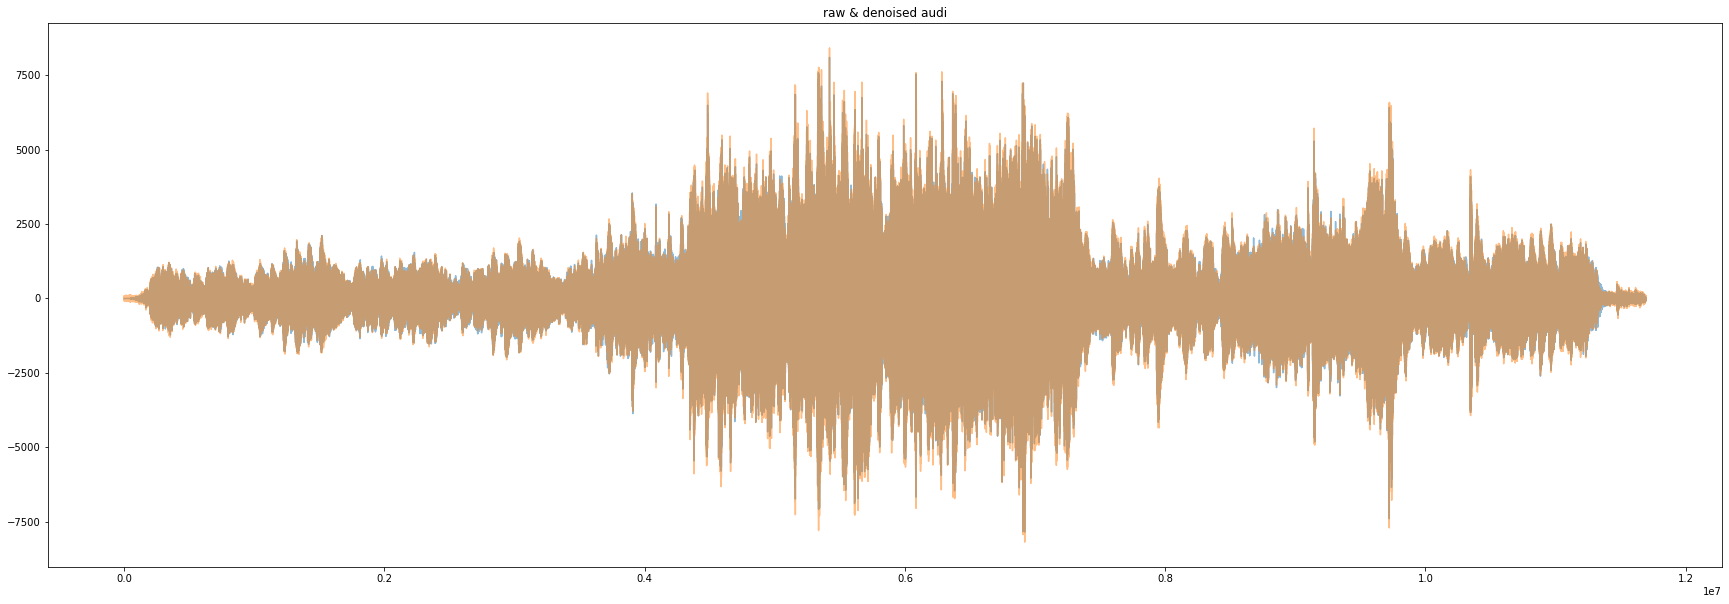

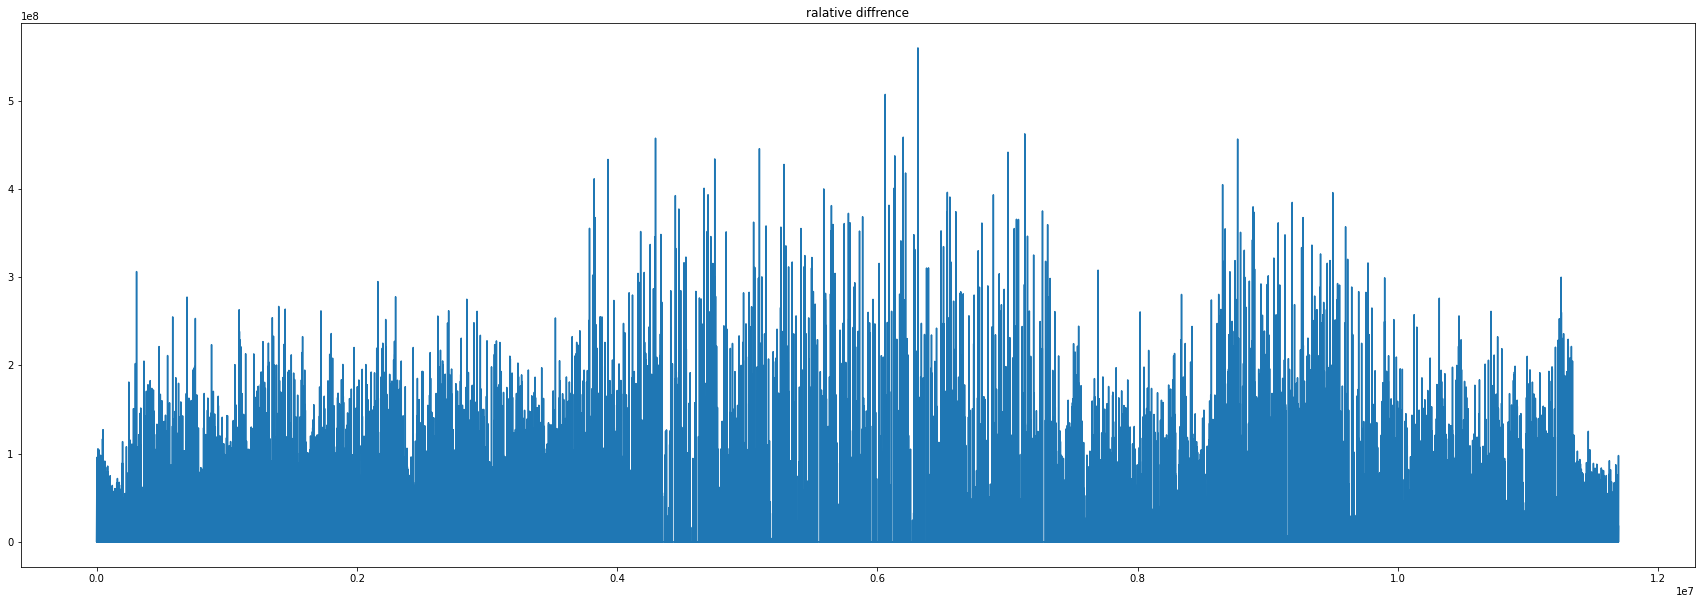

In [3]:
plt.figure(figsize=(30, 10))
plt.plot(np.arange(audio_data.shape[0]), noised_data)
plt.title("noised audio")
plt.show()

plt.figure(figsize=(30, 10))
plt.plot(
    np.arange(
        audio_data.shape[0]), np.vstack(
            (audio_data, denoised_data)).real.T, alpha=0.5)
plt.title("raw & denoised audi")
plt.show()

relative_diff = np.abs((audio_data - denoised_data) / (audio_data + 1e-6))
plt.figure(figsize=(30, 10))
plt.plot(np.arange(audio_data.shape[0]), relative_diff)
plt.title("ralative diffrence")
plt.show()
